In [134]:
import pandas as pd #tablas https://pandas.pydata.org/docs/user_guide/pyarrow.html
import numpy as np #estadistica https://numpy.org/doc/1.25/user/index.html#user
import matplotlib.pyplot as plt #gráficos https://matplotlib.org/stable/plot_types/index.html
import seaborn as sns #gráficos https://seaborn.pydata.org/tutorial/regression.html
from sklearn import linear_model #modelo de regresion https://scikit-learn.org/stable/
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import datetime #https://docs.python.org/3/library/datetime.html
from datetime import timedelta #this is a good time to learn about dates and timestamps. You can find some info here:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_1samp
import scipy.stats as st

In [135]:
df = pd.read_csv('melbourne_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [136]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [137]:
df.shape

(34857, 21)

# 1

Describe the data in price

In [138]:
df['Price'].describe()

count    2.724700e+04
mean     1.050173e+06
std      6.414671e+05
min      8.500000e+04
25%      6.350000e+05
50%      8.700000e+05
75%      1.295000e+06
max      1.120000e+07
Name: Price, dtype: float64

Check unique values  (2871 in total, and a total len of 34857)

In [139]:
df["Price"].value_counts()

1100000.0    235
600000.0     235
650000.0     219
800000.0     217
1300000.0    210
            ... 
1452000.0      1
2555000.0      1
949500.0       1
426500.0       1
1605500.0      1
Name: Price, Length: 2871, dtype: int64

In [140]:
len(df["Price"])

34857

## ANSWER 1: CHECK THE % OF NAN

In [141]:
df["Price"].isnull().sum()/len(df["Price"])

0.2183205668875692

## ACTIVITY 1: DROP NAN AND CONVERT INTO INTERGER PRICE COLUMN

In [142]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [143]:
df= df.dropna(subset=["Price"])

In [144]:
df["Price"] = df["Price"].astype(int)

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/1202961789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = df["Price"].astype(int)


In [145]:
df["Price"].dtypes

dtype('int64')

# 2 Which is the most common type of property and %

In [146]:
df[["Type"]]

,Type
1,h
2,h
4,h
5,h
6,h
...,...
34852,h
34853,h
34854,t
34855,h


In [147]:
df["Type"].value_counts()


h    18472
u     5909
t     2866
Name: Type, dtype: int64

In [148]:
type_value_counts = df["Type"].value_counts()
total_length = len(df)

(type_value_counts / total_length) * 100

h    67.794620
u    21.686791
t    10.518589
Name: Type, dtype: float64

# 3. A graph for the frequency of each property

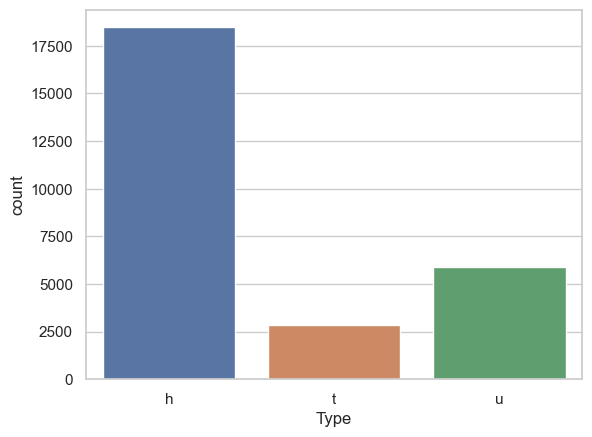

In [149]:
sns.countplot(data=df, x="Type")
plt.show()

# 4. Effect of nuber of room in the median property price using a bar chart

<Axes: xlabel='Rooms', ylabel='Price'>

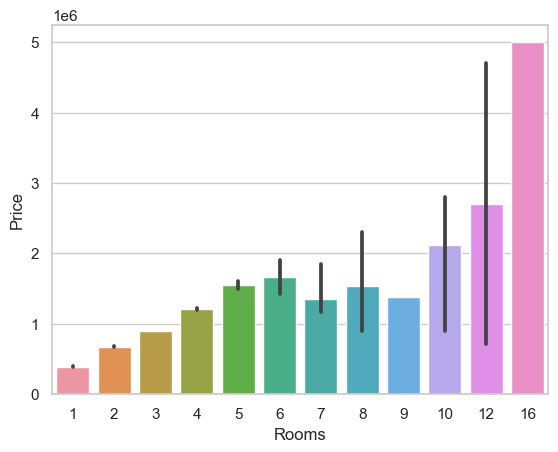

In [150]:
sns.barplot(data=df, x="Rooms", y="Price", estimator=np.median)

In [151]:
df.groupby("Rooms")["Price"].median()

Rooms
1      390000.0
2      678000.0
3      900000.0
4     1205250.0
5     1550000.0
6     1660000.0
7     1350000.0
8     1535883.0
9     1380000.0
10    2115000.0
12    2705000.0
16    5000000.0
Name: Price, dtype: float64

# 5. SPEARMAN CORRELATION COEFFICIENT

In [152]:
from scipy.stats import spearmanr

In [153]:
spearmanr(df["Price"], df["Rooms"])


SignificanceResult(statistic=0.5042971590926004, pvalue=0.0)

# 6. Relationship btween distance from the CBD and property price with a scatter plot and correlation

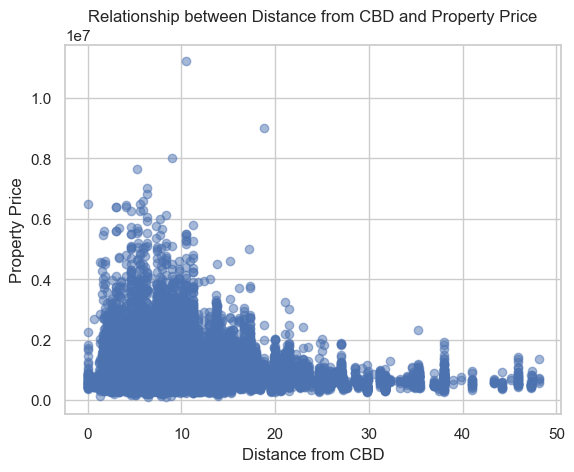

In [154]:
plt.scatter(df["Distance"], df["Price"], alpha=0.5)
plt.title("Relationship between Distance from CBD and Property Price")
plt.xlabel("Distance from CBD")
plt.ylabel("Property Price")
plt.grid(True)

In [155]:
df["Distance"].corr(df["Price"])

-0.21138434279158289

# 7. Relationship between Size and Price

In [156]:
df["BuildingArea"].corr(df["Price"])

0.10075363947310159

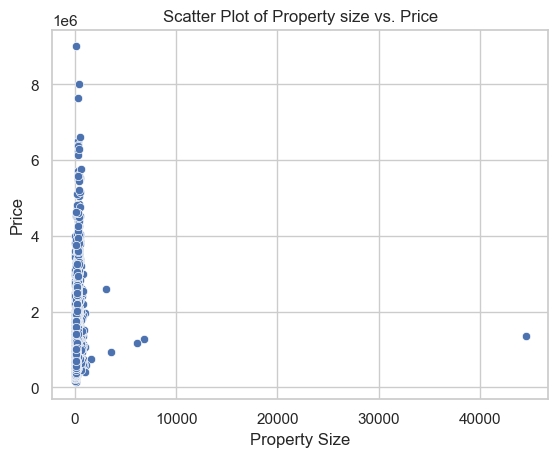

In [157]:
sns.scatterplot(data=df, x="BuildingArea", y="Price")
plt.title("Scatter Plot of Property size vs. Price")
plt.xlabel("Property Size")
plt.ylabel("Price")
plt.show()


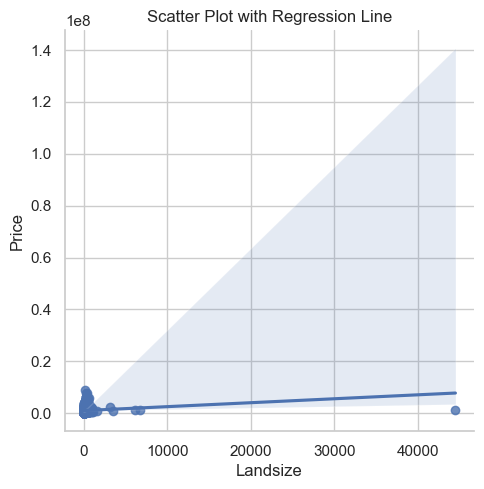

In [158]:
sns.lmplot(data=df, x="BuildingArea", y="Price")
plt.title("Scatter Plot with Regression Line")
plt.xlabel("Landsize")
plt.ylabel("Price")
plt.show()

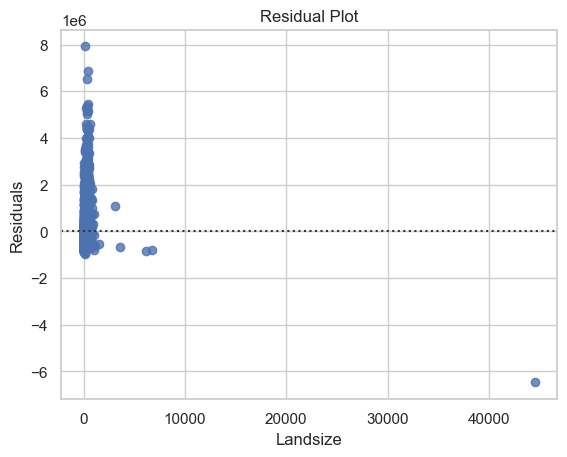

In [159]:
sns.set(style="whitegrid")
sns.residplot(data=df, x="BuildingArea", y="Price")
plt.title("Residual Plot")
plt.xlabel("Landsize")
plt.ylabel("Residuals")
plt.show()

# 8 Visual relationship between land size and price. Use Quantile-based discrezation function to categorize the Landsize variable and create a bar plot. Using q=7 how does the relationship between land size and median property price change compared to using a lower quantile value?

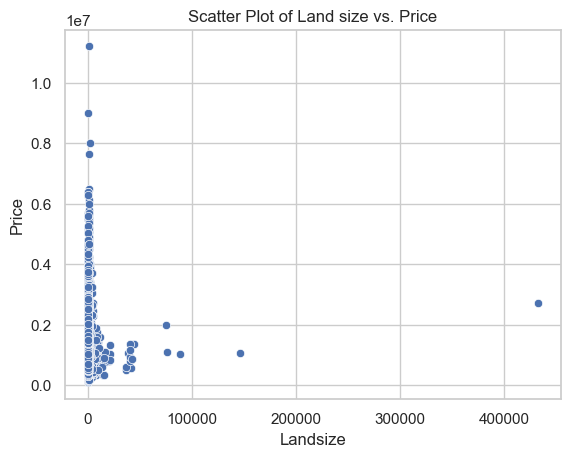

In [160]:
sns.scatterplot(data=df, x="Landsize", y="Price")
plt.title("Scatter Plot of Land size vs. Price")
plt.xlabel("Landsize")
plt.ylabel("Price")
plt.show()

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/1549526504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize_category'] = pd.qcut(df['Landsize'], num_quantiles, labels=False)


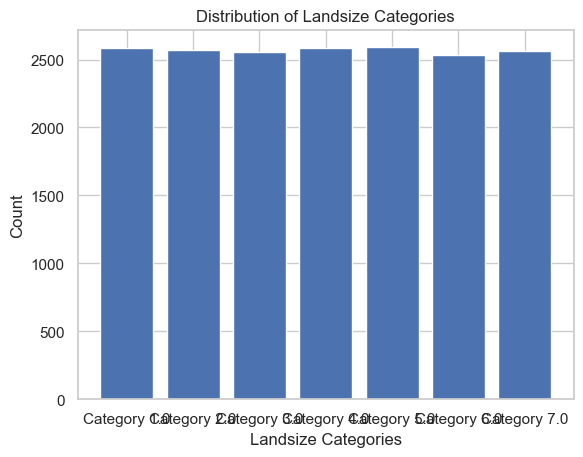

In [161]:
num_quantiles = 7
df['Landsize_category'] = pd.qcut(df['Landsize'], num_quantiles, labels=False)

# Count the occurrences of each category
category_counts = df['Landsize_category'].value_counts().sort_index()

# Create a bar plot
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Landsize Categories')
plt.ylabel('Count')
plt.title('Distribution of Landsize Categories')
plt.xticks(ticks=category_counts.index, labels=[f'Category {i+1}' for i in category_counts.index])
plt.show()

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/2277282365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize_category_q7'] = pd.qcut(df['Landsize'], q=7, labels=False)
/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/2277282365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Landsize_category_q5'] = pd.qcut(df['Landsize'], q=5, labels=False)
/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/2277282365.py:3: SettingWithCopyWarning: 
A val

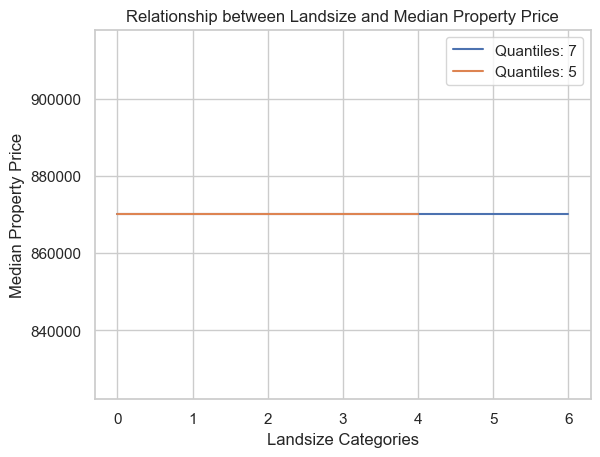

In [162]:
df['Landsize_category_q7'] = pd.qcut(df['Landsize'], q=7, labels=False)
df['Landsize_category_q5'] = pd.qcut(df['Landsize'], q=5, labels=False)
df["Median_Property_Price"] =df["Price"].median()

# Calculate median property price for each category
median_prices_q7 = df.groupby('Landsize_category_q7')['Median_Property_Price'].median()
median_prices_q5 = df.groupby('Landsize_category_q5')['Median_Property_Price'].median()

# Create a line plot to compare the median property prices
plt.plot(median_prices_q7.index, median_prices_q7.values, label='Quantiles: 7')
plt.plot(median_prices_q5.index, median_prices_q5.values, label='Quantiles: 5')
plt.xlabel('Landsize Categories')
plt.ylabel('Median Property Price')
plt.title('Relationship between Landsize and Median Property Price')
plt.legend()
plt.show()

# 9 Box plot the Price column. Use the Turkey's method with a 1.5 treshold to create a new dataframe and identify the % of properties that were outlaiers

{'whiskers': [<matplotlib.lines.Line2D at 0x283a0ba50>,
 'caps': [<matplotlib.lines.Line2D at 0x283a10ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x283a0b190>],
 'medians': [<matplotlib.lines.Line2D at 0x283a11e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x283829410>],
 'means': []}

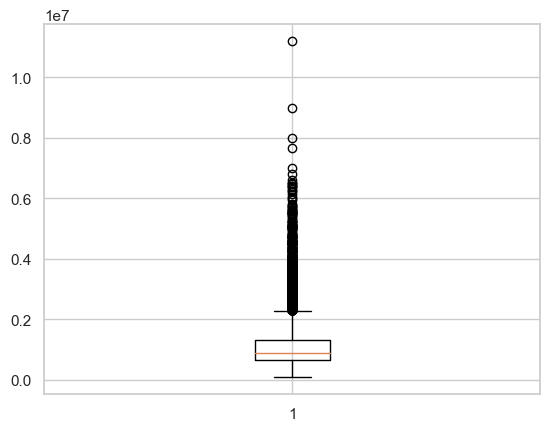

In [163]:
plt.boxplot(df["Price"])

In [164]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]

In [165]:
percentage_outliers = (len(outliers) / len(df)) * 100
percentage_outliers

4.690424633904651

# 10 Price distribution with a QQ plot. Calculate the Skew and kurtosis

In [166]:
import statsmodels.api as sm
import scipy.stats as stats

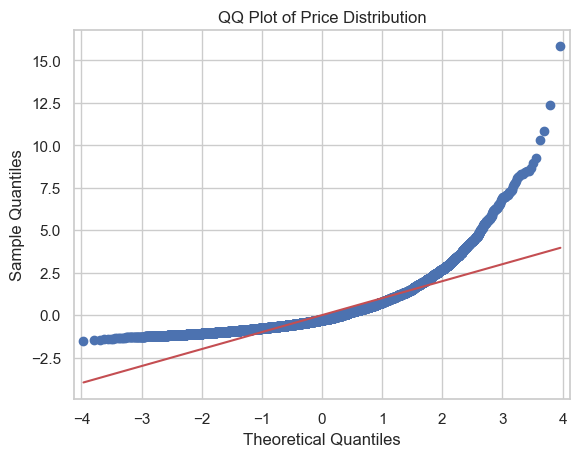

In [167]:
sm.qqplot(df["Price"], line='s', fit=True, dist=stats.norm)
plt.title("QQ Plot of Price Distribution")
plt.show()

In [168]:
price_skewness = stats.skew(df["Price"])
price_kurtosis = stats.kurtosis(df["Price"])

price_skewness , price_kurtosis

(2.588826811108291, 13.094577018742875)

# 11 Perform a normality test (Kolmogorov-Smirnov) on Prices. Conclusions regarding the similarity of the normal distribution 

In [169]:
ks_statistic, p_value = stats.kstest(df["Price"], 'norm')
alpha = 0.05
print(f"Kolmogorov-Smirnov statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")

Kolmogorov-Smirnov statistic: 1.0000
P-value: 0.0000
Reject the null hypothesis: The data is not normally distributed.


# 12 Create  box plot to show the distribution of Prices for each property type

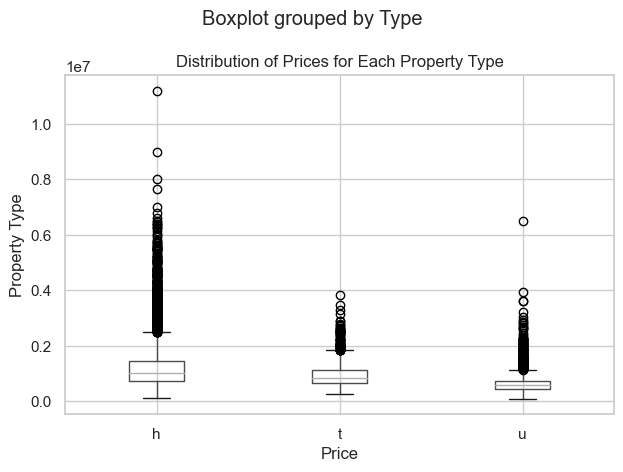

In [170]:
df.boxplot(column='Price', by='Type', vert=True)
plt.xlabel("Price")
plt.ylabel("Property Type")
plt.title("Distribution of Prices for Each Property Type")
plt.tight_layout()
plt.show()

# 13 Region with the highest median price, and region with the lowest median price

In [171]:
df.groupby("Regionname")["Price"].median().idxmax()

'Southern Metropolitan'

In [172]:
df.groupby("Regionname")["Price"].median().idxmin()

'Western Victoria'

# 14 Statistically association between Region and Price using chi square test to asses independence. And Cramer's V coefficient to quantify the strengh of the association. Transform price into 5 different distinc ranges.

In [173]:
bin_edges = [0, 500000, 800000, 1000000, 5000000, float('inf')]
bin_labels = ['<500K', '500K-800K', '800K-1M', '1M-5M', '5M+']

df['Price_Range'] = pd.cut(df['Price'], bins=bin_edges, labels=bin_labels, right=False)


/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/3106583397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price_Range'] = pd.cut(df['Price'], bins=bin_edges, labels=bin_labels, right=False)


In [174]:
grouped_data = df.groupby("Price_Range").agg({
    "Price": ["count", "mean", "median"]
})

grouped_data.columns = ["Count", "Mean_Price", "Median_Price"]

grouped_data

,Count,Mean_Price,Median_Price
Price_Range,,,
<500K,2958,4.087726e+05,420000.0
500K-800K,8663,6.492768e+05,650000.0
800K-1M,4671,8.873330e+05,885000.0
1M-5M,10895,1.586420e+06,1400000.0
5M+,60,5.857733e+06,5550000.0


In [186]:
data_crosstab = pd.crosstab(df['Regionname'], df['Price_Range'], margins = False)
data_crosstab

Price_Range,<500K,500K-800K,800K-1M,1M-5M,5M+
Regionname,,,,,
Eastern Metropolitan,82,714,764,1711,1
Eastern Victoria,21,100,35,10,0
Northern Metropolitan,1135,3183,1418,2125,3
Northern Victoria,53,83,19,11,0
South-Eastern Metropolitan,77,555,346,362,1
Southern Metropolitan,697,1583,921,5268,55
Western Metropolitan,813,2429,1166,1407,0
Western Victoria,80,14,1,1,0


In [191]:
st.chi2_contingency(data_crosstab)[1]

0.0

In [189]:
alpha = 0.05

print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant association between Region and Price_Range.")
else:
    print("Fail to reject the null hypothesis: Region and Price_Range are statistically independent.")

Chi-square statistic: 4527.6656
P-value: 0.0000
Reject the null hypothesis: There is a statistically significant association between Region and Price_Range.


In [195]:
def cramers_v(contingency_table):
    st.chi2_contingency(data_crosstab)[1]
    n = data_crosstab.sum().sum()
    min_dim = min(data_crosstab.shape) - 1
    return np.sqrt(st.chi2_contingency(data_crosstab)[1] / (n * min_dim))

cramers_v_coefficient = cramers_v(contingency_table)

# Interpret the strength of association based on Cramer's V
if cramers_v_coefficient <= 0.1:
    strength = "Weak"
elif cramers_v_coefficient <= 0.3:
    strength = "Moderate"
else:
    strength = "Strong"


print(f"Cramer's V coefficient: {cramers_v_coefficient:.4f}")
print(f"Strength of association: {strength}")

Cramer's V coefficient: 0.0000
Strength of association: Weak


In [199]:
contingency_table = pd.crosstab(df["Regionname"], df["Price_Range"])

# Calculate Cramer's V coefficient
def cramers_v(contingency_table):
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

cramers_v_coefficient = cramers_v(contingency_table)

# Interpret the strength of association based on Cramer's V
if cramers_v_coefficient <= 0.1:
    strength = "Weak"
elif cramers_v_coefficient <= 0.3:
    strength = "Moderate"
else:
    strength = "Strong"

# Print the calculated Cramer's V and the strength of association
print(f"Cramer's V coefficient: {cramers_v_coefficient:.4f}")
print(f"Strength of association: {strength}")

Cramer's V coefficient: 0.2038
Strength of association: Moderate


# 15. Change in the median price of properties sold between the ealiest year and the last year

In [205]:
selected_columns = df[["Date", "Price"]]
selected_columns

,Date,Price
1,3/12/2016,1480000
2,4/02/2016,1035000
4,4/03/2017,1465000
5,4/03/2017,850000
6,4/06/2016,1600000
...,...,...
34852,24/02/2018,1480000
34853,24/02/2018,888000
34854,24/02/2018,705000
34855,24/02/2018,1140000


In [206]:
selected_columns["Date"] = pd.to_datetime(selected_columns["Date"], format='%d/%m/%Y')

# Extract the month and year into separate columns
selected_columns["Month"] = selected_columns["Date"].dt.month
selected_columns["Year"] = selected_columns["Date"].dt.year

selected_columns

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/2781602044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns["Date"] = pd.to_datetime(selected_columns["Date"], format='%d/%m/%Y')
/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/2781602044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns["Month"] = selected_columns["Date"].dt.month
/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/2781602044.py:5: SettingWithCopyWarning: 


,Date,Price,Month,Year
1,2016-12-03,1480000,12,2016
2,2016-02-04,1035000,2,2016
4,2017-03-04,1465000,3,2017
5,2017-03-04,850000,3,2017
6,2016-06-04,1600000,6,2016
...,...,...,...,...
34852,2018-02-24,1480000,2,2018
34853,2018-02-24,888000,2,2018
34854,2018-02-24,705000,2,2018
34855,2018-02-24,1140000,2,2018


In [214]:
selected_columns["Year"] = selected_columns["Date"].dt.year

# Group by "Year" and perform aggregation on the "Price" column
grouped_by_year = selected_columns.groupby("Year").agg({
    "Price": ["mean", "median", "std"]
})

# Rename the aggregated columns for clarity
grouped_by_year.columns = ["Mean_Price", "Median_Price", "Price_Std"]
pd.options.display.float_format = '{:.2f}'.format
grouped_by_year


/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/742723819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns["Year"] = selected_columns["Date"].dt.year


,Mean_Price,Median_Price,Price_Std
Year,,,
2016,1063226.51,885000.00,657673.79
2017,1051144.06,875000.00,640528.81
2018,1017458.41,836500.00,607598.55


In [215]:
(836500-885000)/885000

-0.05480225988700565

In [222]:

selected_columns["Month"] = selected_columns["Date"].dt.month
selected_columns.groupby("Month").size().sort_values()

/var/folders/dm/hhj01rls7tz3g5v4m3hhj1bw0000gn/T/ipykernel_37687/3034145236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns["Month"] = selected_columns["Date"].dt.month


Month
1      649
4     1206
12    1490
2     2067
8     2324
7     2359
3     2362
6     2425
5     2620
10    3118
9     3219
11    3408
dtype: int64